In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np


# Ring Modulation Basic

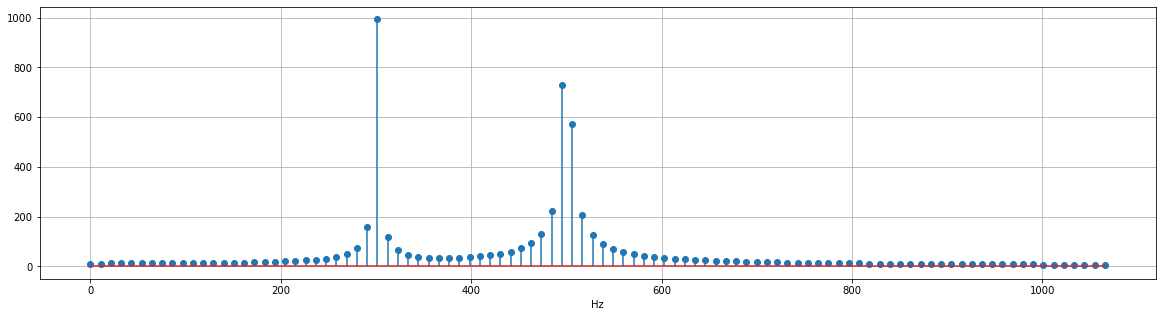

In [50]:
fc = 400
fm = 100   # change this frequency from 1, 2, 5, 10, 20, 100, 200
dur = 1
sr = 44100

x_c = np.sin(2*np.pi*fc*np.arange(dur*sr)/sr);
x_m = np.sin(2*np.pi*fm*np.arange(dur*sr)/sr);

# ring modulation
y = x_c*x_m;

win_size = 4096
FFT_size = 4096

y_seg = y[:win_size]
Y= np.fft.fft(y_seg)
Y_mag = np.abs(Y)
Y_mag2 = Y_mag[:100]
f = sr/FFT_size*np.arange(100)

# plot linear scale
plt.figure(figsize=(20, 5))
plt.stem(f,Y_mag2)
plt.xlabel('Hz')
plt.grid(True)


ipd.Audio(y, rate=sr)


# Ring Modulation with Sawtooth

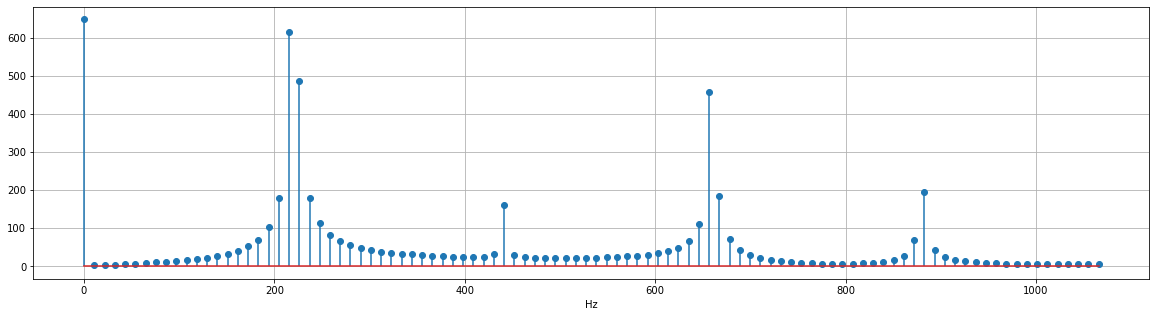

In [51]:
def sawtooth_osc(f0, dur, sr): 
# sr:  sampling rate
# dur: duration
# f0:  fundamental frequency

    phase_inc = 2/(sr/f0)
    phase = 0
    x = np.zeros(int(sr*dur))
    
    for n in range(len(x)):
        phase = phase + phase_inc
        if (phase > 1):
            phase = phase - 2
            
        x[n] = phase
        
    return x    


# sawtooth oscillator
sr = 44100
f0 = 220
dur = 1
x_saw = sawtooth_osc(f0, dur, sr)


# modulating oscillator
fm = 440 # change this frequency from 1, 2, 5, 10, 20, 110, 220

x_m = np.sin(2*np.pi*fm*np.arange(len(x_saw))/sr);

# ring modulation
y = x_saw*x_m;


# display
win_size = 4096
FFT_size = 4096

y_seg = y[:win_size]
Y= np.fft.fft(y_seg)
Y_mag = np.abs(Y)
Y_mag2 = Y_mag[:100]
f = sr/FFT_size*np.arange(100)

# plot linear scale
plt.figure(figsize=(20, 5))
plt.stem(f,Y_mag2)
plt.xlabel('Hz')
plt.grid(True)

ipd.Audio(y, rate=sr)



# Alien Sound Effect with RM

In [53]:
x, sr = librosa.load("../audio/suzanne.wav") 


# modulating oscillator
fm = 200

x_m = np.sin(2*np.pi*fm*np.arange(len(x))/sr);

# ring modulation
y = x*x_m;

ipd.Audio(y, rate=sr)



# FM Synthesis: Basic Tone


In [54]:
sr = 22050         # sampling rate 
fc = 440           # carrier frequency
fm = 220           # modulation frequency 
note_dur = 1       # length in second
beta = 10          # beta parameters in FM
attack_time = 0.01 # attack time in second

# amplitude envelope
env_attack = np.linspace(0,1,int(attack_time*sr))
env_decay = np.logspace(np.log10(1),np.log10(0.1), note_dur*sr-len(env_attack))
env = np.append(env_attack, env_decay)

# generate FM oscillator
t = np.linspace(0, note_dur, note_dur*sr)
x_note = np.sin(2*np.pi*fc*t + beta*np.sin(2*np.pi*fm*t))

# apply the ampltidue envelope
x_note_env = np.multiply(x_note, env)
    
ipd.Audio(x_note_env, rate=sr)

# FM Synthesis: Bell Sound

In [44]:
sr = 22050         # sampling rate 
fc = 200           # carrier frequency
fm = 280           # modulation frequency 
note_dur = 3       # length in second
beta_max = 5      # beta parameters in FM
attack_time = 0.01 # attack time in second


# amplitude envelope
env_attack = np.linspace(0,1,int(attack_time*sr))
env_decay = np.logspace(np.log10(1),np.log10(0.1), note_dur*sr-len(env_attack))
env = np.append(env_attack, env_decay)

# beta
beta = beta_max*env

# FM oscillator
t = np.linspace(0,note_dur, note_dur*sr)
x_note = np.sin(2*np.pi*fc*t + beta*np.sin(2*np.pi*fm*t));

# apply the ampltidue envelope
x_note_env = np.multiply(x_note, env)
    
ipd.Audio(x_note_env, rate=sr)

# FM Synthesis: Brass Instrument

In [45]:
sr = 22050         # sampling rate 
note_dur = 2       # length in second
beta_max = 5       # beta parameters in FM
attack_time = 0.3  # attack time in second

# MIDI note number: C4=60, C5=72, ... 
notes = [60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60]
note_legnths = [1,1,1,1,1,1,2,1,1,1,1,1,1,2]

# envelope
attack_time = 0.01 # second

x = []
for i in range(len(notes)):    
    # fundamental frequency
    f0= 440*np.power(2.0,(notes[i]-69)/12)
    note_dur = note_legnths[i]*0.5

    # amplitude envelope
    env_attack = np.linspace(0,1,int(attack_time*sr))
    env_decay = np.logspace(np.log10(1),np.log10(0.1), int(note_dur*sr)-len(env_attack))
    env = np.append(env_attack, env_decay)

    # beta
    beta = beta_max*env

    # FM oscillator
    fc = f0
    fm = f0
    t = np.linspace(0, note_dur, int(note_dur*sr))
    x_note = np.sin(2*np.pi*fc*t + beta*np.sin(2*np.pi*fm*t));

    # apply the ampltidue envelope
    x_note_env = np.multiply(x_note, env)
    
    # concatenate notes
    x = np.append(x, x_note_env)
    
ipd.Audio(x, rate=sr)



# FM Synthesis: Electric Piano

In [46]:
sr = 22050         # sampling rate 
note_dur = 2       # length in second
beta_max = 3       # beta parameters in FM
attack_time = 0.05  # attack time in second

# MIDI note number: C4=60, C5=72, ... 
notes = [60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60]
note_legnths = [1,1,1,1,1,1,2,1,1,1,1,1,1,2]

# envelope
attack_time = 0.01 # second

x = []
for i in range(len(notes)):    
    # fundamental frequency
    f0= 440*np.power(2.0,(notes[i]-69)/12)
    note_dur = note_legnths[i]*0.5

    # amplitude envelope
    env_attack = np.linspace(0,1,int(attack_time*sr))
    env_decay = np.logspace(np.log10(1),np.log10(0.1), int(note_dur*sr)-len(env_attack))
    env = np.append(env_attack, env_decay)

    # beta
    beta = beta_max*env

    # FM oscillator
    fc = f0
    fm = 10*fc
    t = np.linspace(0, note_dur, int(note_dur*sr))
    x_note = np.sin(2*np.pi*fc*t + beta*np.sin(2*np.pi*fm*t));

    # apply the ampltidue envelope
    x_note_env = np.multiply(x_note, env)
    
    # concatenate notes
    x = np.append(x, x_note_env)
    
ipd.Audio(x, rate=sr)

